# Custom 2D heat map to differentiate between two groups

Below is a contrived data set of two groups of data having similar values spreads 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generating synthetic data with increased overlap
n_samples = 100000
# Generating X and Y coordinates for two groups with increased overlap
x_group1 = np.random.normal(loc=0, scale=2, size=n_samples // 2)
x_group2 = np.random.normal(loc=1.5, scale=2, size=n_samples // 2)

y_group1 = np.random.normal(loc=0, scale=2, size=n_samples // 2)
y_group2 = np.random.normal(loc=1.5, scale=2, size=n_samples // 2)

# Combine X and Y coordinates for two groups
X = np.concatenate([x_group1, x_group2])
Y = np.concatenate([y_group1, y_group2])

# Create a binary variable to separate the groups
group = np.zeros(n_samples)
group[n_samples // 2:] = 1  # Set the second group as '1'

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y, 'Group': group})

Below is an example of a standard scatter plot with this data, we can see group A is definetly shifted to the upper right compared to group B but its not really clear with all the overlap and random spread.

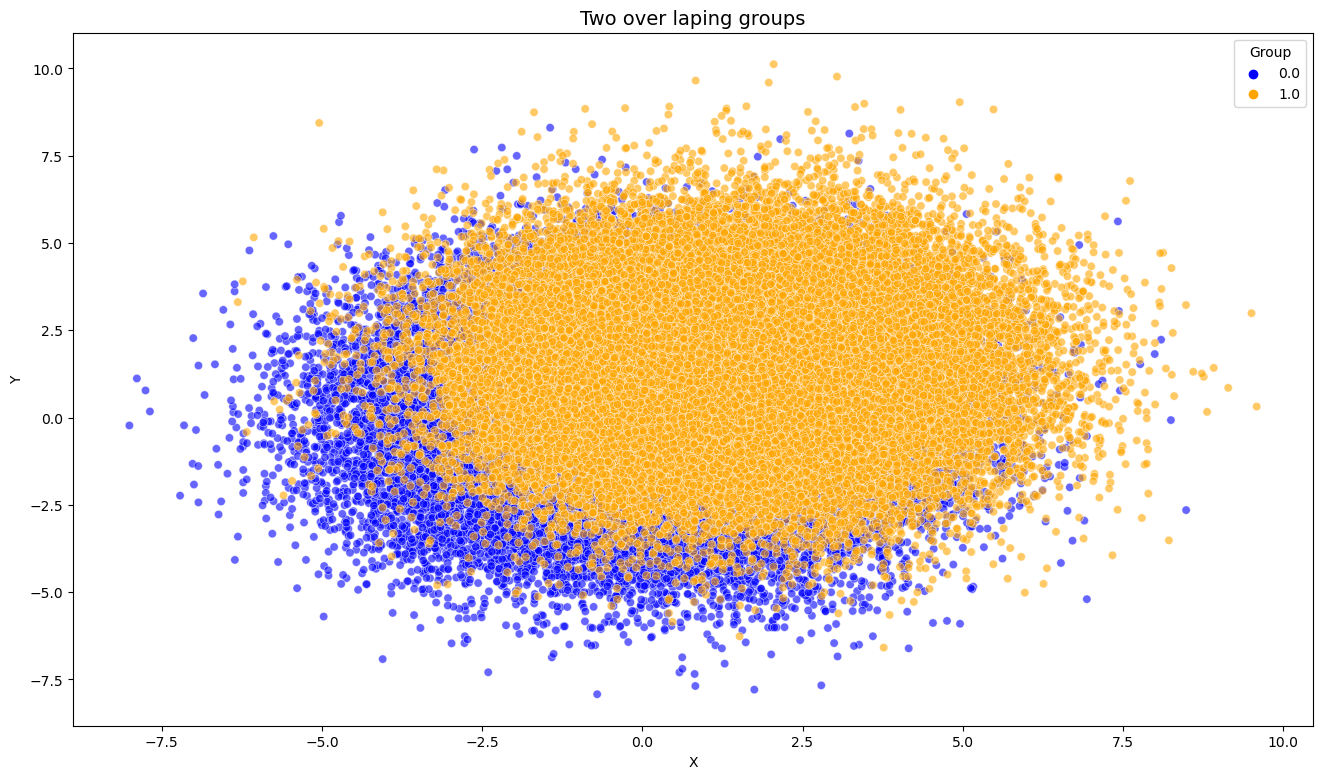

In [15]:
plt.figure(figsize=(16, 9))
numerical_palette = {0: 'blue', 1: 'orange'} 
sns.scatterplot(data=data, x='X', y='Y', hue='Group', alpha=0.6,palette=numerical_palette)
plt.title('Two over laping groups', fontsize='14');

Below is the heat map that splits the plot into a number of bins and then finds the precentage of group A vs group B in each bin giving you a visualization of how much of each group is where.

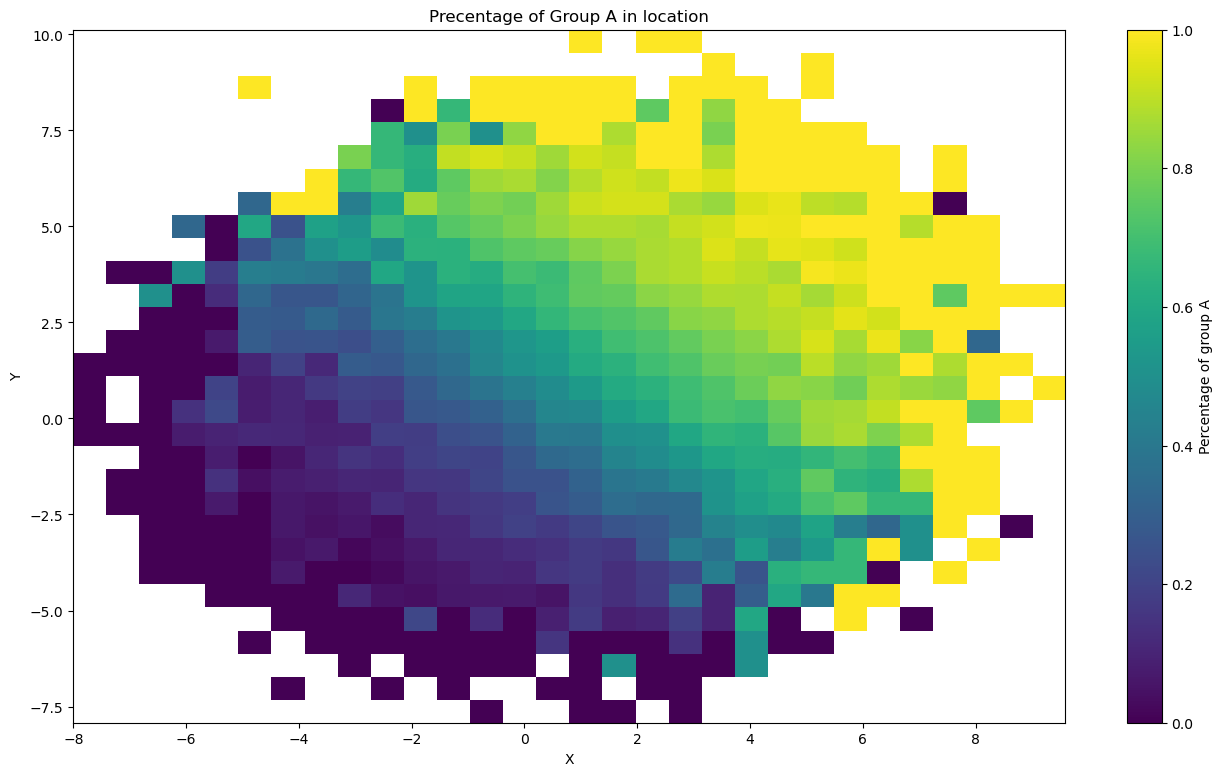

In [20]:

# Sample scatter plot data (replace this with your data)
x_values = data['X'].values
y_values = data['Y'].values
z_values = data['Group'].values #Binary value

# Define the number of bins across each axis
num_bins = 30 #find what values works best 

#Define the grid determined by chosen bin size
x_bins = np.linspace(min(x_values), max(x_values), num_bins + 1)
y_bins = np.linspace(min(y_values), max(y_values), num_bins + 1)

# Use digitize to determine which bin each x and y value belongs to
x_bin_indices = np.digitize(x_values, x_bins)
y_bin_indices = np.digitize(y_values, y_bins)

# Calculate the averages of each group values within each bin
z_averages = np.zeros((num_bins, num_bins)) * np.nan  # Initialize with NaNs
count_per_bin = np.zeros((num_bins, num_bins))

for i in range(num_bins):
    for j in range(num_bins):
        indices = np.where((x_bin_indices == i + 1) & (y_bin_indices == j + 1))
        z_values_in_bin = z_values[indices]
        if len(z_values_in_bin) > 0:
            z_averages[i, j] = np.mean(z_values_in_bin)
            count_per_bin[i, j] = len(z_values_in_bin)

# Create a figure and axis with a square aspect ratio
plt.figure(figsize=(16, 9))
plt.imshow(z_averages.T[::-1], cmap='viridis', interpolation='nearest', extent=[min(x_values), max(x_values), min(y_values), max(y_values)], aspect='auto', vmin=0, vmax=1) 
plt.colorbar(label='Percentage of group A')
plt.title('Precentage of Group A in location')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(False)
plt.show()